# Fit the final model and make predictions

In [1]:
library(magrittr)

In [2]:
feature_df = readr::read_tsv('features/transformed-features.tsv.bz2')

In [3]:
head(feature_df, 2)

,compound_id,compound_name,disease_id,disease_name,category,status,prior_prob,prior_logit,degree_CbG,degree_CcSE,ellip.h,dwpc_CtDtCuGdD,dwpc_CtDuGaD,dwpc_CtDuGbCtD,dwpc_CuGaDpCtD,dwpc_CuGbCtD,dwpc_CuGcG<rGdD,dwpc_CuGdD,dwpc_CuGr>GcGdD,dwpc_CuGuCbGaD,dwpc_CuGuDpCtD
1,DB01048,Abacavir,DOID:10652,Alzheimer's disease,NA,0,0.004753,-5.344,-0.2955,0.8146,⋯,4.715,4.141,-0.1961,-0.2294,-0.1657,-0.2636,-0.1547,-0.3162,-0.5496,-0.193
2,DB05812,Abiraterone,DOID:10652,Alzheimer's disease,NA,0,0.004753,-5.344,0.5495,0.5554,⋯,4.936,2.327,-0.1961,-0.2294,-0.1657,-0.2636,-0.1547,-0.3162,-0.5496,-0.193


In [4]:
train_df = feature_df %>%
  dplyr::filter(prior_prob > 0)
dim(train_df)

[1] 29799   121

In [5]:
X_train = train_df %>%
  dplyr::select(prior_logit, starts_with('degree_'), starts_with('dwpc_')) %>%
  as.matrix()
dim(X_train)
y_train = train_df$status
table(y_train)

[1] 29799   114

y_train
    0     1 
29044   755 

In [6]:
penalty = ifelse(colnames(X_train) == 'prior_logit', 0, 1)
fit = hetior::glmnet_train(X = X_train, y = y_train, alpha = 1, s = 'lambda.1se', cores = 12, seed = 0,
    penalty.factor=penalty, lambda.min.ratio=1e-7, nlambda=500, standardize=TRUE)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



[1] 0.0003874117

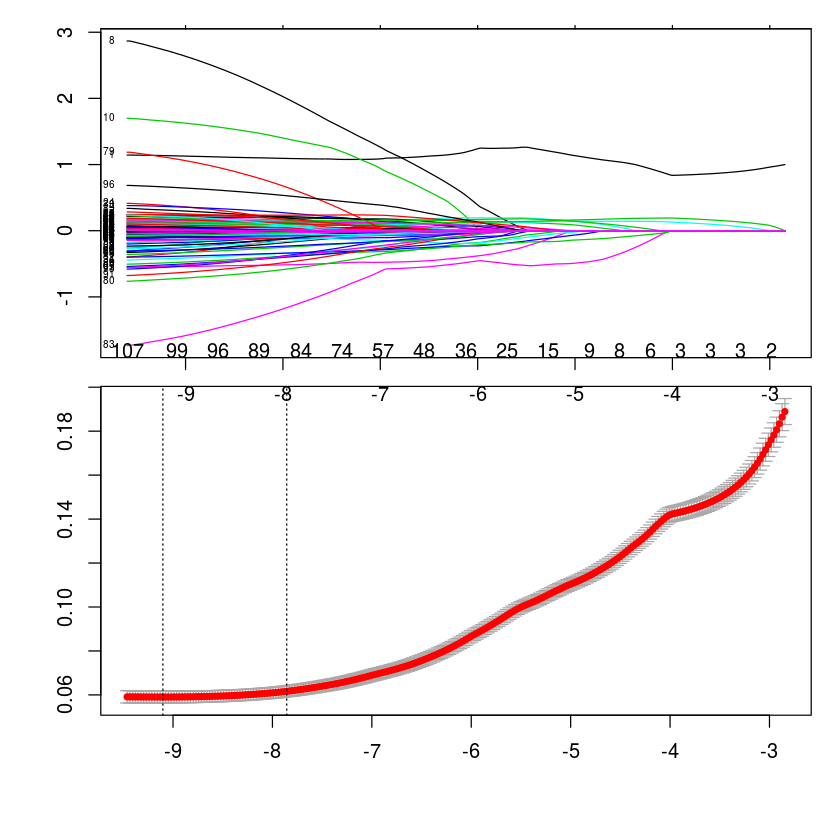

In [7]:
par(mfrow = c(2,1), oma = c(5,4,0,0) + 0.1, mar = c(0,0,1,1) + 0.1)
plot(fit$cv_model$glmnet.fit, xvar = "lambda", label = TRUE)
plot(fit$cv_model)
fit$cv_model$lambda.1se

In [8]:
# The coefficient for prior_logit should be around 1 for our approach to work well
dplyr::filter(fit$coef_df, feature == 'prior_logit')$coef

[1] 1.08954

In [9]:
fit$coef_df %>% readr::write_tsv('model/coefficient.tsv')

In [10]:
# training performance
fit$vtm[c('auroc', 'auprc', 'tjur')]

$auroc
[1] 0.9920363

$auprc
[1] 0.878274

$tjur
[1] 0.664239

In [11]:
# prior performance on training
vtm = hetior::calc_vtms(y_true = train_df$status, y_pred = train_df$prior_prob, T)
vtm[c('auroc', 'auprc', 'tjur')]

$auroc
[1] 0.850502

$auprc
[1] 0.1628536

$tjur
[1] 0.08693251

In [12]:
# prior performance on all observations
vtm = hetior::calc_vtms(y_true = feature_df$status, y_pred = feature_df$prior_prob, T)
vtm[c('auroc', 'auprc', 'tjur')]

$auroc
[1] 0.9791663

$auprc
[1] 0.1628536

$tjur
[1] 0.1068422

In [13]:
# Sum of prior (should sum to the number of treatments)
sum(feature_df$prior_prob)

# Prevalence of positives as percent
scales::percent(mean(feature_df$status))

[1] 754.9903

[1] "0.361%"

In [14]:
X_all = feature_df %>%
  dplyr::mutate(prior_logit = boot::logit(mean(status))) %>%
  dplyr::select(one_of(colnames(X_train))) %>%
  as.matrix()
y_pred = hetior::glmnet_predict(fit$cv_model, X = X_all, s = 'lambda.1se')

In [15]:
train_pred_df = train_df %>%
  dplyr::select(compound_id, disease_id) %>%
  dplyr::bind_cols(dplyr::data_frame(training_prediction = fit$y_pred))

predict_df = feature_df %>%
  dplyr::select(compound_id:category, status) %>%
  dplyr::mutate(prediction = y_pred) %>%
  dplyr::left_join(train_pred_df)

Joining by: c("compound_id", "disease_id")


In [16]:
# Prediction performance
vtm = hetior::calc_vtms(y_true = predict_df$status, y_pred = predict_df$prediction, T)
vtm[c('auroc', 'auprc', 'tjur')]

$auroc
[1] 0.9012027

$auprc
[1] 0.33249

$tjur
[1] 0.314297

In [17]:
predict_df %>%
  dplyr::arrange(desc(prediction)) %>%
  head(5)

,compound_id,compound_name,disease_id,disease_name,category,status,prediction,training_prediction
1,DB00808,Indapamide,DOID:10763,hypertension,DM,1,0.9942755,0.9998779
2,DB00542,Benazepril,DOID:10763,hypertension,DM,1,0.9937673,0.999867
3,DB00884,Risedronate,DOID:11476,osteoporosis,DM,1,0.9936408,0.9995393
4,DB00524,Metolazone,DOID:10763,hypertension,DM,1,0.9931158,0.999853
5,DB00310,Chlorthalidone,DOID:10763,hypertension,DM,1,0.9931122,0.9998529


In [18]:
predict_df %>% readr::write_tsv('predictions/probabilities.tsv', na = '')

## Contribution 

In [19]:
coef_df = fit$coef_df %>%
  dplyr::filter(!(feature %in% c('intercept', 'prior_logit'))) %>%
  dplyr::filter(coef != 0)

In [20]:
contribution_df = predict_df %>% 
  dplyr::select(compound_id, disease_id) %>%
  dplyr::bind_cols(
  X_all[, coef_df$feature] %>%
    sweep(MARGIN = 2, STATS = coef_df$coef, FUN = `*`) %>%
    as.data.frame()
)

contribution_df %>% head(2)

,compound_id,disease_id,degree_CbG,degree_CdG,degree_CiPC,degree_CpD,degree_CrC,degree_CtD,degree_CuG,degree_DaG,ellip.h,dwpc_CtDtCdGaD,dwpc_CtDtCdGuD,dwpc_CtDtCtD,dwpc_CtDuGaD,dwpc_CtDuGbCtD,dwpc_CuGaDpCtD,dwpc_CuGcG<rGdD,dwpc_CuGdD,dwpc_CuGr>GcGdD,dwpc_CuGuCbGaD
1,DB01048,DOID:10652,0.02712895,0.04452871,-0.1303966,0.04296616,0.262495,1.862382,0.0256514,1.438839,⋯,-0.1770915,-0.2737836,-0.04144757,-0.2717274,0.0117245,0.005694935,-0.02810883,0.002030206,-0.0003756392,-0.03220464
2,DB05812,DOID:10652,-0.05044791,0.04452871,0.07043737,0.04296616,0.4795662,1.862382,0.0256514,1.438839,⋯,-0.3017003,-0.3923171,-0.04144757,-0.1526949,0.0117245,0.005694935,-0.02810883,0.002030206,-0.0003756392,-0.03220464
